# This is the solution of the laboratories' homework for Statistical Learning Methods course
Mateusz Wiejak, mw117894




### A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import FeatureAgglomeration, SpectralClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits, load_breast_cancer
import umap

In [197]:
digits = load_digits()
digits.data.shape


(1797, 64)

In [181]:
fagg_embedding =  FeatureAgglomeration(n_clusters=2).fit_transform(digits.data)
print(fagg_embedding.shape)

(1797, 2)


In [182]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

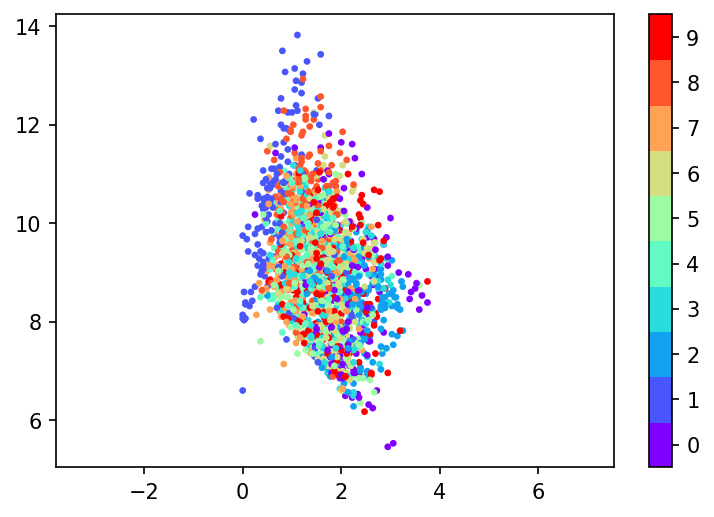

In [183]:
plot_reduced_data(fagg_embedding,digits.target)

In [203]:
svd_embedding =  TruncatedSVD(n_components=2).fit_transform(digits.data)
svd_embedding.shape

(1797, 2)

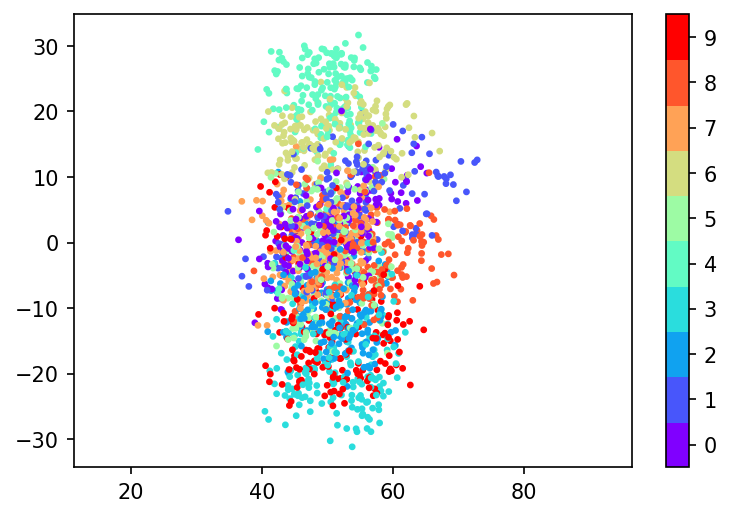

In [204]:
plot_reduced_data(svd_embedding,digits.target)

### B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)

In [202]:
breast_cancer = load_breast_cancer()
breast_cancer.data.shape

(569, 30)

In [212]:
fagg_embedding_brcanc =  FeatureAgglomeration(n_clusters=2).fit_transform(breast_cancer.data)
fagg_embedding_brcanc.shape

(569, 2)

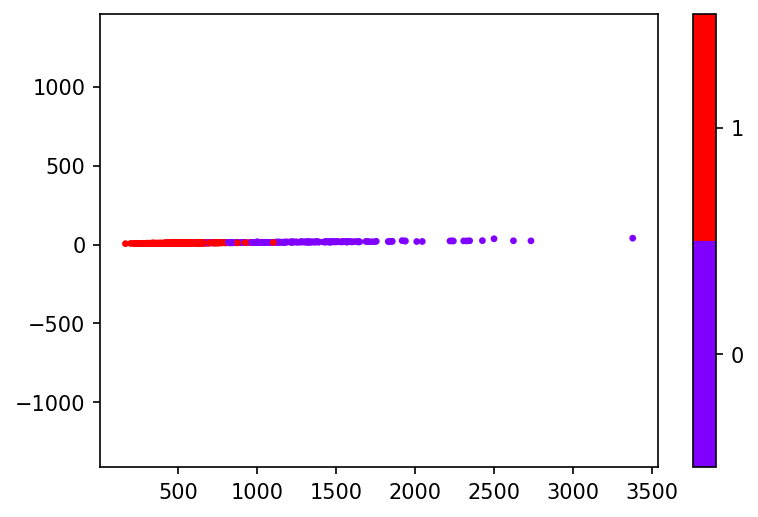

In [215]:
plot_reduced_data(fagg_embedding_brcanc, breast_cancer.target)

In [217]:
svd_embedding_brcanc =  TruncatedSVD(n_components=2).fit_transform(breast_cancer.data)
svd_embedding_brcanc.shape

(569, 2)

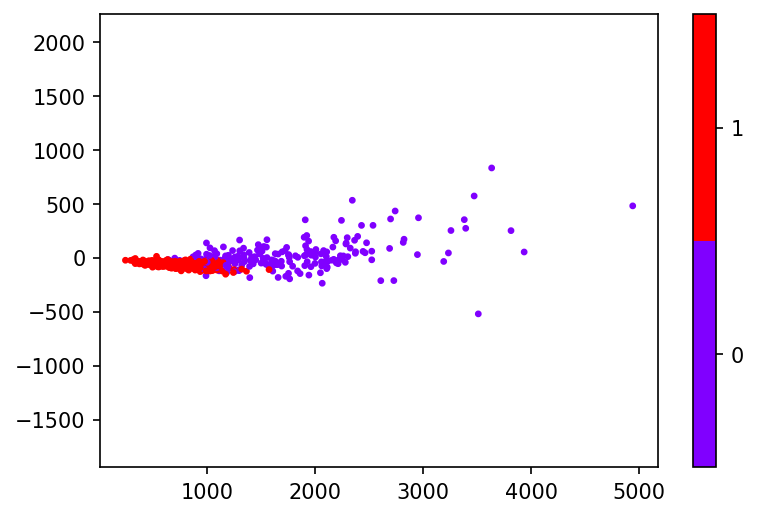

In [218]:
plot_reduced_data(svd_embedding_brcanc, breast_cancer.target)

### C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

In [229]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [230]:
species = df.species
df = df.drop('species', axis = 1)
df = pd.DataFrame(StandardScaler().fit(df).transform(df))

In [240]:
spectral = SpectralClustering(n_clusters=3, random_state=0).fit(df)
spectral.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [241]:
model = umap.UMAP(random_state=42)
umap_embedding = model.fit(df).transform(df)

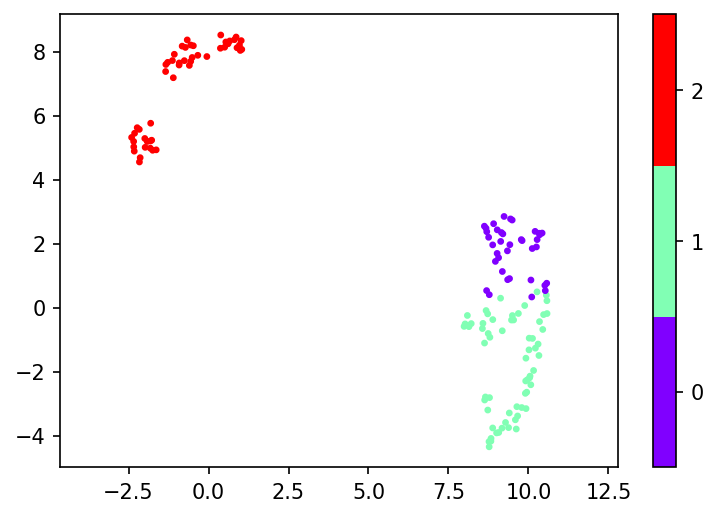

In [242]:
plot_reduced_data(umap_embedding,spectral.labels_)